# Integrantes:

Ángela Patricia Ordoñez Castro. <br>
Cód: 201628709

Juan Sebastián Garcés Carranza. <br>
Cód: 201628949

# Exercise 02

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

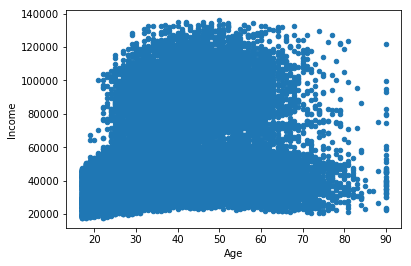

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

In [4]:
# Importar paquetes
from sklearn.linear_model import LinearRegression

# Creamos las variables
Age=income['Age'].values.reshape(income.shape[0],1)
Income=income['Income'].values.reshape(income.shape[0],1)

# Ajustar modelo de regresión para los ingresos y la edad
lm = LinearRegression(fit_intercept=False)
lm.fit(Age, Income)

# Coeficientes del modelo
print("Intercepto", lm.intercept_)
print("Coeficiente asociado a la edad", lm.coef_)

Intercepto 0.0
Coeficiente asociado a la edad [[ 1291.82348999]]


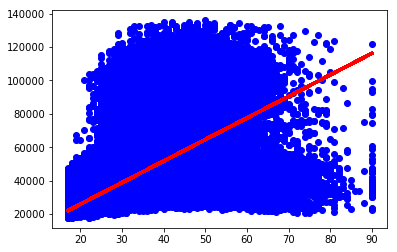

In [5]:
plt.scatter(Age, Income,c='b')
plt.plot(Age, lm.predict(Age), color='red', linewidth=3)

In [6]:
# Pornósticos para personas con 30 y 40 años de edad.

y30=lm.predict(30)
y40=lm.predict(40)

print("x=30:", y30)
print("x=40:", y40)

x=30: [[ 38754.70469957]]
x=40: [[ 51672.93959943]]


# Exercise 2.2
Evaluate the model using the MSE

In [7]:
from sklearn import metrics

income_pred = lm.predict(Age)

print('MSE:', metrics.mean_squared_error(income['Income'], income_pred))

MSE: 711412514.359



# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

Se crea una nueva variable que sea igual a la edad al cuadrado y se construye una matriz X con las dos variables:

In [8]:
Age2=income['Age']**2
X = pd.concat([income['Age'], Age2], axis=1, join_axes=[income['Age'].index])
X.columns = ['Age', 'Age2']

Utilizando la siguiente formula, es posible generar los betas la regresión y se ajusta el modelo:

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

In [9]:
# Valores iniciales de los betas
beta_ini = ((np.matrix(X.T)*np.matrix(X))**-1)*(np.matrix(X.T)*np.matrix(income['Income']).T)
beta_ini = np.squeeze(np.asarray(beta_ini))

# Función para ajustar el modelo lineal 
def lr_h(beta,x):
    return np.dot(beta, x.T)

Los coeficientes del modelo son los siguientes:

In [10]:
print('Coeficientes', beta_ini)

Coeficientes [ 2346.62896328   -21.97439239]


La forma que tiene la función ajustada mediante este modelo se muestra en la siguiente gráfica:

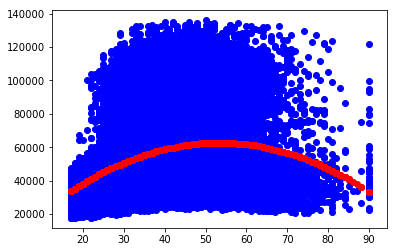

In [11]:
# Plot
plt.scatter(Age, Income,c='b')

# Plot the linear regression
income_pred2 = beta_ini[0]*X.Age+beta_ini[1]*X.Age2
plt.scatter(Age, income_pred2, color="r")

In [17]:
print('MSE:', metrics.mean_squared_error(income['Income'], income_pred2))

MSE: 549233115.876


# Exercise 2.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [13]:
income.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Income'],
      dtype='object')

In [14]:
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [60]:
# Crear nuevas variables dummies y unirlas con la base original
df_sex=pd.get_dummies(income['Sex'])
df_Edu=pd.get_dummies(income['Education'])
df_Workc=pd.get_dummies(income['Workclass'])
df_Race=pd.get_dummies(income['Race'])

income2 = pd.concat([income, df_sex, df_Edu, df_Workc, df_Race], axis=1, join_axes=[income.index])

In [61]:
income2.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Income',
       'isUS', 'Female', 'Male', '10th', '11th', '12th', '1st-4th', '5th-6th',
       '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate',
       'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college',
       'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander', 'Black', 'Other', 'White'],
      dtype='object')

In [80]:
# Ajustar modelo de regresión con más variables explicativas
X2=income2[['Hours per week', 'Age', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Female', 'Federal-gov', 
            'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov']]
y=income2['Income']

lm2 = LinearRegression(fit_intercept=False)
lm2.fit(X2, y)

# Coeficientes del modelo
print("Coeficientes", lm2.coef_)

Coeficientes [  1.89654774e+02   3.82312336e+02   3.52277956e+03   4.40937326e-01
   5.45108289e+00  -2.07362495e+04   5.21785653e+03   2.59571601e+03
   3.46812185e+02   1.39097858e+03   7.30066818e+03  -5.11547299e+02
   1.51992124e+03]


In [81]:
income_pred3 = lm2.predict(X2)

print('MSE:', metrics.mean_squared_error(y, income_pred3))

MSE: 347105101.437


# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

In [64]:
income2['isUS'] = (income2['Country'] == 'United-States')*1.0
income2['isUS'].value_counts()

1.0    29170
0.0     3391
Name: isUS, dtype: int64

In [66]:
income2.Race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [85]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['Income', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov']
X3 = income2[feature_cols]
y3 = income2['isUS'] 

logreg.fit(X3, y3)
income2['US_pred'] = logreg.predict(X3)

Para medir el desempeño del modelo se calcula el MAE, el MSE y el RMSE: 

In [86]:
print('Accuracy:', metrics.accuracy_score(y3, income2['US_pred']))
print('AUC:', metrics.roc_auc_score(y3, income2['US_pred']))

Accuracy: 0.895857006849
AUC: 0.5


Aunque la precisión del modelo resulta ser muy alta (cercana al 90%), esta medida no es confiable pues el modelo clasifica a todas las personas en una sola categoría (Persona en Estados Unidos), lo anterior se da porque las clases de la variable dependiente están desbalanceadas.

In [87]:
income2['US_pred'].value_counts()

1.0    32561
Name: US_pred, dtype: int64